In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn import metrics
from src.cnnTraining import dataPreparation, accuracyPlot, lossPlot

Using TensorFlow backend.


In [2]:
print('Preparing the database')
# featuresDf = pd.read_pickle('./dataset/featuresDF_1.pkl')
featuresDf = pd.read_pickle('./dataset/featuresDF_2.pkl')
X, y, val_x, val_y = dataPreparation(featuresDf)
input_shape = (12, 32, 1)

Preparing the database


In [12]:
X.shape

(32717, 12, 32, 1)

In [15]:
32717/61

536.344262295082

In [ ]:
print('Building the Neural Network')
filepath='./models/stage2_cnn_checkpoint_{epoch:02d}_{val_loss:.2f}.hdf5'

checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True) # mode='max'
callbacks_list=[checkpointer]

num_labels = y.shape[1]
num_filters = 64
filter_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(num_filters, filter_size, input_shape=input_shape,
                strides=2, padding='same', activation='relu'))
model.add(Conv2D(num_filters, filter_size))
model.add(BatchNormalization())
model.add(Conv2D(num_filters, filter_size))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Compile the model:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Train the model:
print('Training the Neural Network')
history = model.fit(X, y, batch_size=536, epochs=500, validation_data=(val_x, val_y),
                callbacks=callbacks_list)
print('Model trained')

Building the Neural Network
Training the Neural Network
Train on 32717 samples, validate on 8180 samples
Epoch 1/500
32717/32717 [==============================] - 19s 582us/step - loss: 1.9132 - accuracy: 0.3043 - val_loss: 1.7410 - val_accuracy: 0.3682

Epoch 00001: val_loss improved from inf to 1.74098, saving model to ./models/stage2_cnn_checkpoint_01_1.74.hdf5
Epoch 2/500
32717/32717 [==============================] - 19s 587us/step - loss: 1.7091 - accuracy: 0.3840 - val_loss: 1.6710 - val_accuracy: 0.3957

Epoch 00002: val_loss improved from 1.74098 to 1.67097, saving model to ./models/stage2_cnn_checkpoint_02_1.67.hdf5
Epoch 3/500
32717/32717 [==============================] - 19s 588us/step - loss: 1.6441 - accuracy: 0.4176 - val_loss: 1.5698 - val_accuracy: 0.4512

Epoch 00003: val_loss improved from 1.67097 to 1.56976, saving model to ./models/stage2_cnn_checkpoint_03_1.57.hdf5
Epoch 4/500
32717/32717 [==============================] - 18s 564us/step - loss: 1.5992 - accurac


Epoch 00031: val_loss did not improve from 0.62009
Epoch 32/500
32717/32717 [==============================] - 18s 552us/step - loss: 0.7065 - accuracy: 0.7539 - val_loss: 0.6049 - val_accuracy: 0.7910

Epoch 00032: val_loss improved from 0.62009 to 0.60488, saving model to ./models/stage2_cnn_checkpoint_32_0.60.hdf5
Epoch 33/500
32717/32717 [==============================] - 18s 546us/step - loss: 0.6604 - accuracy: 0.7687 - val_loss: 0.5827 - val_accuracy: 0.8042

Epoch 00033: val_loss improved from 0.60488 to 0.58275, saving model to ./models/stage2_cnn_checkpoint_33_0.58.hdf5
Epoch 34/500
32717/32717 [==============================] - 18s 542us/step - loss: 0.6426 - accuracy: 0.7767 - val_loss: 0.5589 - val_accuracy: 0.8048

Epoch 00034: val_loss improved from 0.58275 to 0.55889, saving model to ./models/stage2_cnn_checkpoint_34_0.56.hdf5
Epoch 35/500
32717/32717 [==============================] - 19s 581us/step - loss: 0.6158 - accuracy: 0.7847 - val_loss: 0.5462 - val_accuracy: 

32717/32717 [==============================] - 19s 579us/step - loss: 0.4413 - accuracy: 0.8458 - val_loss: 0.3807 - val_accuracy: 0.8764

Epoch 00064: val_loss improved from 0.38258 to 0.38066, saving model to ./models/stage2_cnn_checkpoint_64_0.38.hdf5
Epoch 65/500
32717/32717 [==============================] - 19s 577us/step - loss: 0.4411 - accuracy: 0.8470 - val_loss: 0.3778 - val_accuracy: 0.8752

Epoch 00065: val_loss improved from 0.38066 to 0.37779, saving model to ./models/stage2_cnn_checkpoint_65_0.38.hdf5
Epoch 66/500
32717/32717 [==============================] - 18s 560us/step - loss: 0.4415 - accuracy: 0.8457 - val_loss: 0.3637 - val_accuracy: 0.8806

Epoch 00066: val_loss improved from 0.37779 to 0.36372, saving model to ./models/stage2_cnn_checkpoint_66_0.36.hdf5
Epoch 67/500
32717/32717 [==============================] - 18s 547us/step - loss: 0.4316 - accuracy: 0.8513 - val_loss: 0.3628 - val_accuracy: 0.8792

Epoch 00067: val_loss improved from 0.36372 to 0.36281, s

32717/32717 [==============================] - 19s 565us/step - loss: 0.3407 - accuracy: 0.8810 - val_loss: 0.2883 - val_accuracy: 0.9040

Epoch 00097: val_loss improved from 0.29334 to 0.28828, saving model to ./models/stage2_cnn_checkpoint_97_0.29.hdf5
Epoch 98/500
32717/32717 [==============================] - 20s 626us/step - loss: 0.3733 - accuracy: 0.8707 - val_loss: 0.3025 - val_accuracy: 0.9027

Epoch 00098: val_loss did not improve from 0.28828
Epoch 99/500
32717/32717 [==============================] - 20s 624us/step - loss: 0.3557 - accuracy: 0.8754 - val_loss: 0.3034 - val_accuracy: 0.8985

Epoch 00099: val_loss did not improve from 0.28828
Epoch 100/500
32717/32717 [==============================] - 19s 584us/step - loss: 0.3501 - accuracy: 0.8787 - val_loss: 0.2900 - val_accuracy: 0.9062

Epoch 00100: val_loss did not improve from 0.28828
Epoch 101/500
32717/32717 [==============================] - 18s 542us/step - loss: 0.3399 - accuracy: 0.8825 - val_loss: 0.2907 - val_

32717/32717 [==============================] - 18s 544us/step - loss: 0.3049 - accuracy: 0.8913 - val_loss: 0.2504 - val_accuracy: 0.9178

Epoch 00134: val_loss improved from 0.25158 to 0.25041, saving model to ./models/stage2_cnn_checkpoint_134_0.25.hdf5
Epoch 135/500
32717/32717 [==============================] - 18s 545us/step - loss: 0.2909 - accuracy: 0.8988 - val_loss: 0.2528 - val_accuracy: 0.9191

Epoch 00135: val_loss did not improve from 0.25041
Epoch 136/500
32717/32717 [==============================] - 18s 550us/step - loss: 0.2909 - accuracy: 0.8992 - val_loss: 0.2499 - val_accuracy: 0.9172

Epoch 00136: val_loss improved from 0.25041 to 0.24992, saving model to ./models/stage2_cnn_checkpoint_136_0.25.hdf5
Epoch 137/500
32717/32717 [==============================] - 18s 548us/step - loss: 0.2830 - accuracy: 0.9005 - val_loss: 0.2481 - val_accuracy: 0.9197

Epoch 00137: val_loss improved from 0.24992 to 0.24808, saving model to ./models/stage2_cnn_checkpoint_137_0.25.hdf5


32717/32717 [==============================] - 20s 615us/step - loss: 0.2651 - accuracy: 0.9080 - val_loss: 0.2229 - val_accuracy: 0.9286

Epoch 00170: val_loss improved from 0.22532 to 0.22287, saving model to ./models/stage2_cnn_checkpoint_170_0.22.hdf5
Epoch 171/500
32717/32717 [==============================] - 23s 706us/step - loss: 0.2615 - accuracy: 0.9081 - val_loss: 0.2297 - val_accuracy: 0.9253

Epoch 00171: val_loss did not improve from 0.22287
Epoch 172/500
32717/32717 [==============================] - 22s 663us/step - loss: 0.2577 - accuracy: 0.9082 - val_loss: 0.2309 - val_accuracy: 0.9270

Epoch 00172: val_loss did not improve from 0.22287
Epoch 173/500
32717/32717 [==============================] - 22s 661us/step - loss: 0.2731 - accuracy: 0.9040 - val_loss: 0.2270 - val_accuracy: 0.9280

Epoch 00173: val_loss did not improve from 0.22287
Epoch 174/500
32717/32717 [==============================] - 21s 651us/step - loss: 0.2851 - accuracy: 0.8998 - val_loss: 0.2238 - v

32717/32717 [==============================] - 23s 696us/step - loss: 0.2482 - accuracy: 0.9133 - val_loss: 0.2106 - val_accuracy: 0.9342

Epoch 00208: val_loss did not improve from 0.20982
Epoch 209/500
32717/32717 [==============================] - 19s 580us/step - loss: 0.2516 - accuracy: 0.9122 - val_loss: 0.2198 - val_accuracy: 0.9278

Epoch 00209: val_loss did not improve from 0.20982
Epoch 210/500
32717/32717 [==============================] - 20s 616us/step - loss: 0.2698 - accuracy: 0.9061 - val_loss: 0.2165 - val_accuracy: 0.9304

Epoch 00210: val_loss did not improve from 0.20982
Epoch 211/500
32717/32717 [==============================] - 19s 594us/step - loss: 0.2624 - accuracy: 0.9074 - val_loss: 0.2127 - val_accuracy: 0.9323

Epoch 00211: val_loss did not improve from 0.20982
Epoch 212/500
32717/32717 [==============================] - 19s 584us/step - loss: 0.2416 - accuracy: 0.9152 - val_loss: 0.2111 - val_accuracy: 0.9325

Epoch 00212: val_loss did not improve from 0.


Epoch 00246: val_loss did not improve from 0.20155
Epoch 247/500
32717/32717 [==============================] - 20s 613us/step - loss: 0.2343 - accuracy: 0.9190 - val_loss: 0.2006 - val_accuracy: 0.9330

Epoch 00247: val_loss improved from 0.20155 to 0.20058, saving model to ./models/stage2_cnn_checkpoint_247_0.20.hdf5
Epoch 248/500
32717/32717 [==============================] - 21s 629us/step - loss: 0.2294 - accuracy: 0.9190 - val_loss: 0.1983 - val_accuracy: 0.9358

Epoch 00248: val_loss improved from 0.20058 to 0.19827, saving model to ./models/stage2_cnn_checkpoint_248_0.20.hdf5
Epoch 249/500
32717/32717 [==============================] - 22s 672us/step - loss: 0.2237 - accuracy: 0.9226 - val_loss: 0.1998 - val_accuracy: 0.9361

Epoch 00249: val_loss did not improve from 0.19827
Epoch 250/500
32717/32717 [==============================] - 24s 719us/step - loss: 0.2250 - accuracy: 0.9211 - val_loss: 0.2089 - val_accuracy: 0.9320

Epoch 00250: val_loss did not improve from 0.19827


32717/32717 [==============================] - 22s 664us/step - loss: 0.2244 - accuracy: 0.9203 - val_loss: 0.1939 - val_accuracy: 0.9372

Epoch 00285: val_loss did not improve from 0.18926
Epoch 286/500
32717/32717 [==============================] - 20s 597us/step - loss: 0.2041 - accuracy: 0.9284 - val_loss: 0.1883 - val_accuracy: 0.9390

Epoch 00286: val_loss improved from 0.18926 to 0.18828, saving model to ./models/stage2_cnn_checkpoint_286_0.19.hdf5
Epoch 287/500
32717/32717 [==============================] - 21s 635us/step - loss: 0.2154 - accuracy: 0.9245 - val_loss: 0.2006 - val_accuracy: 0.9317

Epoch 00287: val_loss did not improve from 0.18828
Epoch 288/500
32717/32717 [==============================] - 20s 602us/step - loss: 0.2400 - accuracy: 0.9164 - val_loss: 0.1931 - val_accuracy: 0.9374

Epoch 00288: val_loss did not improve from 0.18828
Epoch 289/500
32717/32717 [==============================] - 19s 588us/step - loss: 0.2165 - accuracy: 0.9228 - val_loss: 0.1889 - v

32717/32717 [==============================] - 18s 547us/step - loss: 0.2230 - accuracy: 0.9208 - val_loss: 0.1910 - val_accuracy: 0.9397

Epoch 00323: val_loss did not improve from 0.18183
Epoch 324/500
32717/32717 [==============================] - 18s 548us/step - loss: 0.2094 - accuracy: 0.9264 - val_loss: 0.1897 - val_accuracy: 0.9399

Epoch 00324: val_loss did not improve from 0.18183
Epoch 325/500
32717/32717 [==============================] - 18s 543us/step - loss: 0.2108 - accuracy: 0.9234 - val_loss: 0.1927 - val_accuracy: 0.9396

Epoch 00325: val_loss did not improve from 0.18183
Epoch 326/500
32717/32717 [==============================] - 18s 541us/step - loss: 0.2024 - accuracy: 0.9287 - val_loss: 0.1806 - val_accuracy: 0.9416

Epoch 00326: val_loss improved from 0.18183 to 0.18056, saving model to ./models/stage2_cnn_checkpoint_326_0.18.hdf5
Epoch 327/500
32717/32717 [==============================] - 18s 555us/step - loss: 0.2002 - accuracy: 0.9294 - val_loss: 0.1908 - v

Test loss: 0.3584835588640572
Test accuracy: 0.8810513615608215
Model saved


FileNotFoundError: [Errno 2] No such file or directory: '../charts/cnn_accuracy_10classes.png'

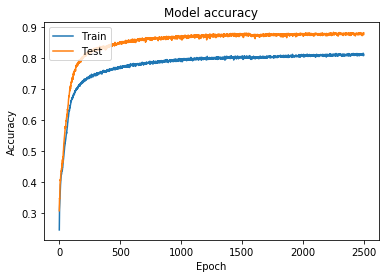

In [6]:
score = model.evaluate(val_x, val_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('./models/stage2_cnn_model_epoch2500.h5')
model_json = model.to_json()
with open("./models/stage2_cnn_model_epoch2500.json", "w") as json_file:
    json_file.write(model_json)    
model.save_weights("./models/stage2_cnn_model_epoch2500_weights.h5")
print('Model saved')
accuracyPlot(history, 10)
lossPlot(history, 10)